# Hotel Review Sentiments Analysis

### Problem Statement
In this project, our goal is to examine how travelers are communicating their positive and negative experiences in online platforms for staying in a specific hotel. Our major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.

In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# data preprocessing
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [5]:
#Load dataset
data_Hotel_review=pd.read_excel('./Hotel_Reviews.xlsx')
data_Hotel_review.head()

,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4* experience hotel monaco seat...,Pos
3,"unique, great stay, wonderful time hotel monac...",Pos
4,"great stay great stay, went seahawk game aweso...",Pos


# Descriptive Statistics

In [6]:
data_Hotel_review.shape

(20491, 2)

In [7]:
data_Hotel_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    20491 non-null  object
 1   Feedback  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [8]:
data_Hotel_review.isnull().sum()

Review      0
Feedback    0
dtype: int64

In [9]:
data_Hotel_review.duplicated().sum()

0

##### Note:

From above analysis, we can say that there are no null values & duplicate data in our dataset.

# EDA (Exploratory Data Analysis)

### 1. Distribution Of Ratings

In [10]:
data_Hotel_review

,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4* experience hotel monaco seat...,Pos
3,"unique, great stay, wonderful time hotel monac...",Pos
4,"great stay great stay, went seahawk game aweso...",Pos
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Pos
20487,great location price view hotel great quick pl...,Pos
20488,"ok just looks nice modern outside, desk staff ...",Neg
20489,hotel theft ruined vacation hotel opened sept ...,Neg


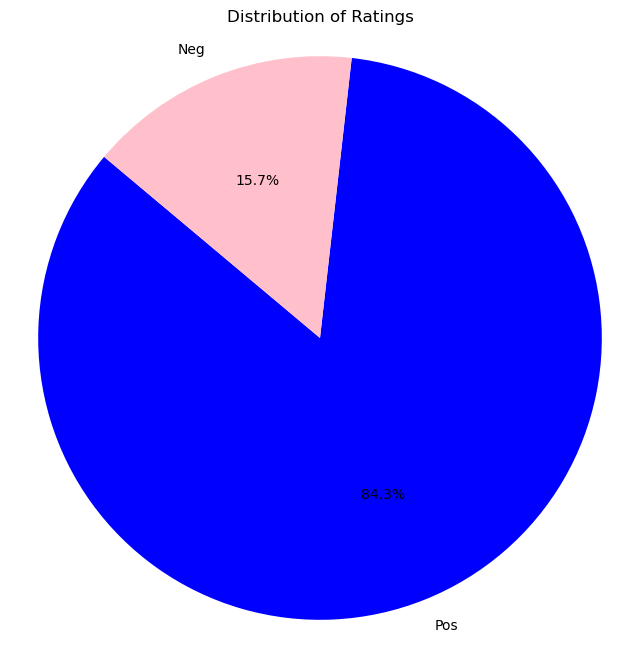

In [11]:
data_Hotel_review['Feedback'].value_counts()

# Plotting the distribution of ratings as a pie chart
plt.figure(figsize=(8, 8))
labels = data_Hotel_review['Feedback'].value_counts().index
sizes = data_Hotel_review['Feedback'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink', 'yellow', 'green', 'red'])
plt.title('Distribution of Ratings')
plt.axis('equal') 
plt.show()

#### Most reviews give hotels high ratings are positive, which make up about 84% of all the feedback. This suggests that guests mostly feel very positive about their experiences. But even though there’s a lot of positivity, it’s important to remember that some people leave negative reviews too which is about 16%. Because there are so many good ratings, it might mean that people are more likely to leave positive reviews. So, it’s super important for hotels to pay attention to both the good and bad comments. By listening to what guests say, hotels can make sure everyone has a great experience, keeping their reputation strong in the long run.

### 2. Parking Feedback

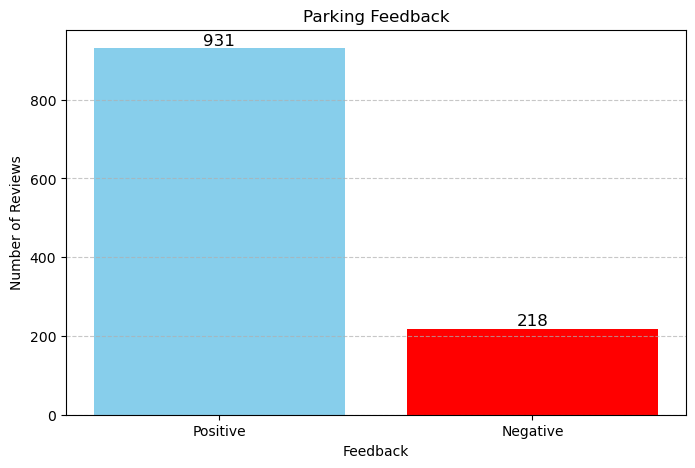

In [12]:
parking_feedback = data_Hotel_review[data_Hotel_review['Review'].str.contains('parking', case=False)]

# Count the number of positive and negative parking feedbacks
positive_count = parking_feedback[parking_feedback['Feedback'] == 'Pos'].shape[0]
negative_count = parking_feedback[parking_feedback['Feedback'] == 'Neg'].shape[0]

# Plotting the graph with the counts displayed on the bars
plt.figure(figsize=(8, 5))
bars = plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['skyblue', 'red'])

# Adding the counts above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)

plt.xlabel('Feedback')
plt.ylabel('Number of Reviews')
plt.title('Parking Feedback')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Looking at our graph, it’s obvious that many people have opinions about the hotel parking. Over 900 guests gave positive feedback, while around 218 weren’t satisfied. This means most guests were happy with the parking, but some weren’t. The hotel needs to consider both positive and negative feedback to ensure everyone has a good parking experience. Plus, they can use the positive feedback to highlight their parking facilities and attract more guests. It’s all about making sure every guest feels valued and comfortable during their stay.

### 3. Expensive Vs Affordable

Number of people saying it's expensive: 2302
Number of people saying it's affordable: 1686


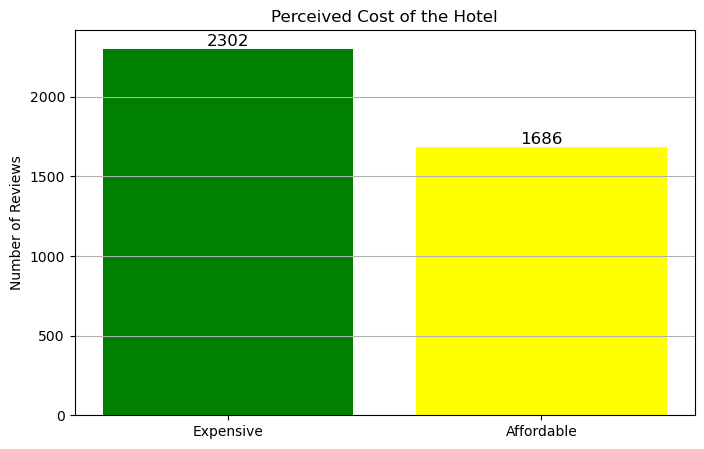

In [13]:
expensive_reviews = data_Hotel_review[data_Hotel_review['Review'].str.contains('expensive|pricey', case=False)]
affordable_reviews = data_Hotel_review[data_Hotel_review['Review'].str.contains('affordable|cheap', case=False)]

# Count the number of reviews mentioning each sentiment
expensive_count = expensive_reviews.shape[0]
affordable_count = affordable_reviews.shape[0]

print("Number of people saying it's expensive:", expensive_count)
print("Number of people saying it's affordable:", affordable_count)

# Plotting the graph with the counts displayed on the bars
plt.figure(figsize=(8, 5))
bars = plt.bar(['Expensive', 'Affordable'], [expensive_count, affordable_count], color=['green', 'yellow'])

# Adding the counts above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)

plt.title('Perceived Cost of the Hotel')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

#### Looking at the graph, we see that many people, around 2,302, think the hotel is pricey. On the flip side, about 1,686 people consider it affordable. This difference shows that everyone has their own idea of what’s expensive or not. While some guests think the prices are fair, others think they’re too high. This tells us that hotels need to consider different guests’ views on pricing. By doing this, they can adjust their prices to make sure they’re fair for everyone. It’s all about finding the right balance between what guests think is worth paying and what they can afford.

### 4. Top 5 Booking Sites

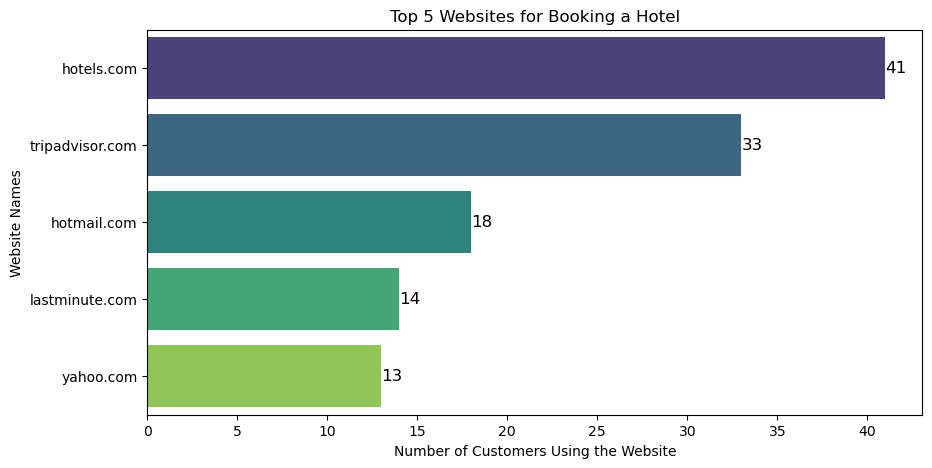

In [14]:
booking_sites = data_Hotel_review['Review'].str.extract(r'(\w+\.com)')[0].value_counts()
# Plot the top 5 booking sites
plt.figure(figsize=(10, 5))
sns.barplot(y=booking_sites.head(5).index, x=booking_sites.head(5), palette='viridis')
plt.title('Top 5 Websites for Booking a Hotel')
plt.xlabel('Number of Customers Using the Website')
plt.ylabel('Website Names')

# Adding the counts above the bars
for index, value in enumerate(booking_sites.head(5)):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12)

plt.show()

#### Analyzing the graph above, we observe that Hotels.com and TripAdvisor.com emerge as the top choices for booking hotels, with 41 and 33 mentions respectively. This indicates a strong trust among travellers towards these platforms for their travel needs. Interestingly, we also notice the presence of Hotmail.com and Yahoo.com, suggesting the influence of email promotions in travellers’ booking decisions. This underscores the significance of user reviews and user-friendly booking processes in shaping travellers’ choices. Overall, the data underscores the pivotal role of online platforms and reviews in the modern travel landscape.

### 5. Family Trip Vs Business Trip

Number of people coming for a business trip: 155
Number of people coming for a family trip: 16


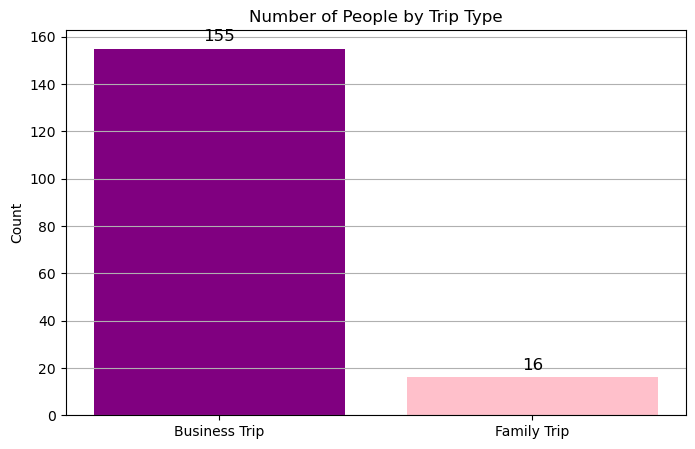

In [15]:
business_trip_count = data_Hotel_review[data_Hotel_review['Review'].str.contains('business trip', case=False)].shape[0]
family_trip_count = data_Hotel_review[data_Hotel_review['Review'].str.contains('family trip', case=False)].shape[0]

print("Number of people coming for a business trip:", business_trip_count)
print("Number of people coming for a family trip:", family_trip_count)

# Plotting the graph with the counts displayed above the bars
plt.figure(figsize=(8, 5))
bars = plt.bar(['Business Trip', 'Family Trip'], [business_trip_count, family_trip_count], color=['purple', 'pink'])

# Adding the counts above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), va='bottom', ha='center', fontsize=12)

plt.title('Number of People by Trip Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

#### After analyzing the hotel reviews, it’s clear that more people, about 155, are visiting for business purposes compared to just 16 for family trips. This indicates that the majority of guests are here for work rather than leisure with their families. Knowing this is crucial for hotels to tailor their services accordingly. They can focus on providing amenities that cater to business travellers, such as reliable Wi-Fi and meeting spaces. However, it’s also essential to consider the needs of families by offering kid-friendly activities and accommodations. Finding the right balance between these two types of guests ensures that hotels can satisfy everyone’s preferences and encourage repeat visits.

### 6.  Plotting Histograms for review length based on Rating

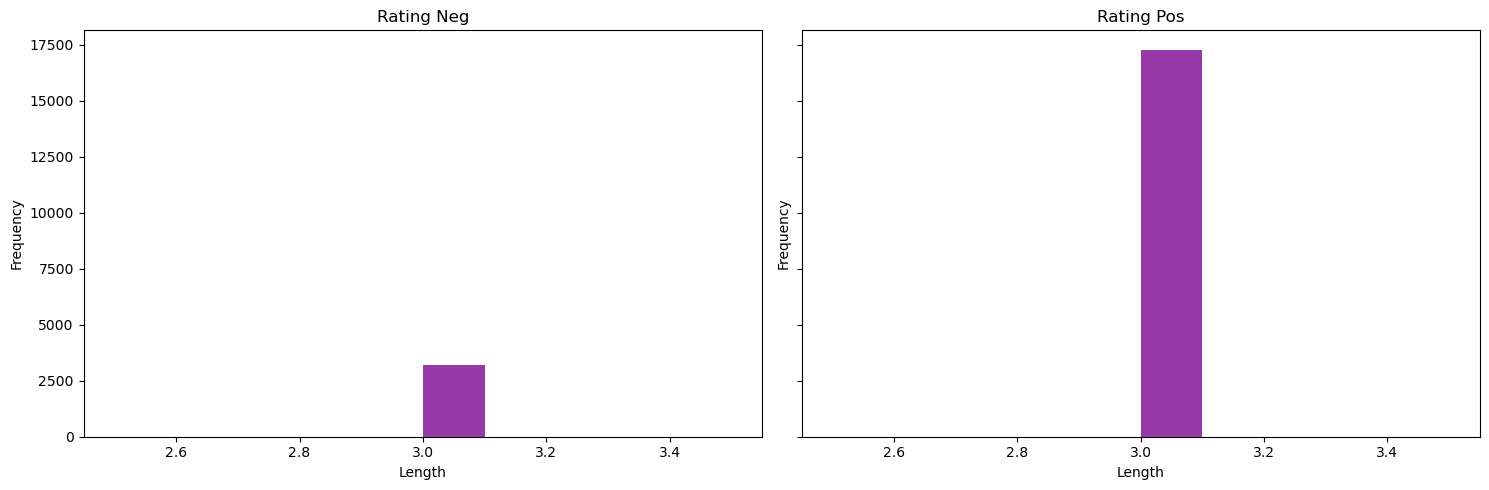

In [16]:
data_Hotel_review['Length'] = data_Hotel_review['Feedback'].apply(len)
data_Hotel_review['num_words'] = data_Hotel_review['Feedback'].apply(word_tokenize).apply(len)

# Create subplots for each rating category
fig, axes = plt.subplots(1, data_Hotel_review['Feedback'].nunique(), figsize=(15, 5), sharey=True)

# Iterate over each subplot and plot the histogram
for ax, (rating, sub_data) in zip(axes, data_Hotel_review.groupby('Feedback')):
    ax.hist(sub_data['Length'], color='#973aa8')
    ax.set_title(f'Rating {rating}')
    ax.set_xlabel('Length')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Text Preprocessing

In [17]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

##### To ensure consistency. In NLP, "Apple" and "apple" would be treated as different tokens if not lowercased, which might not be desirable depending on the use case.
##### Tokenization is a fundamental step in NLP, allowing you to work with individual words. The word_tokenize function (from the NLTK library) converts the input string into a list of words
##### This step removes numbers, punctuation, and other non-alphabetic characters. The function word.isalpha() returns True if the string consists only of alphabetic characters.
##### Top words are often removed in NLP tasks because they do not carry much meaningful information and can reduce the efficiency of processing. The stopwords.words('english') function from the NLTK library provides a list of common English stop words.
##### he output format of most NLP models and tools expects text data to be in string format rather than a list of tokens.

In [18]:
# Apply preprocessing
data_Hotel_review['Processed_Review'] = data_Hotel_review['Review'].apply(preprocess_text)

In [19]:
# WordCloud visualization
all_words = ' '.join([text for text in data_Hotel_review['Processed_Review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

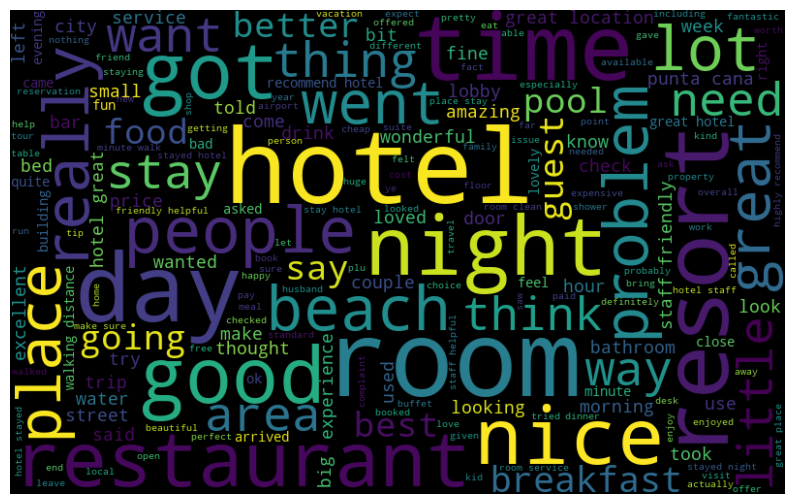

In [20]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Frequency Analysis and Visualization:

### Overall

In [21]:
# Word Cloud Visualization
def plot_wordcloud(words):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [22]:
# Sample tokenized and stemmed data
data_Hotel_review['Stemmed_Tokens'] = data_Hotel_review['Processed_Review'].apply(lambda x: x.split())
# This applies a function to each element in the 'Processed_Review' column. The function x.split() splits each review string into a list of words (tokens). This is a basic form of tokenization where words are separated based on spaces.
# The result is a new column where each entry contains a list of tokens from the corresponding review.
# Combine all tokens into a single list
all_tokens = [token for sublist in data_Hotel_review['Stemmed_Tokens'] for token in sublist]

# Create a frequency distribution
word_freq = Counter(all_tokens)

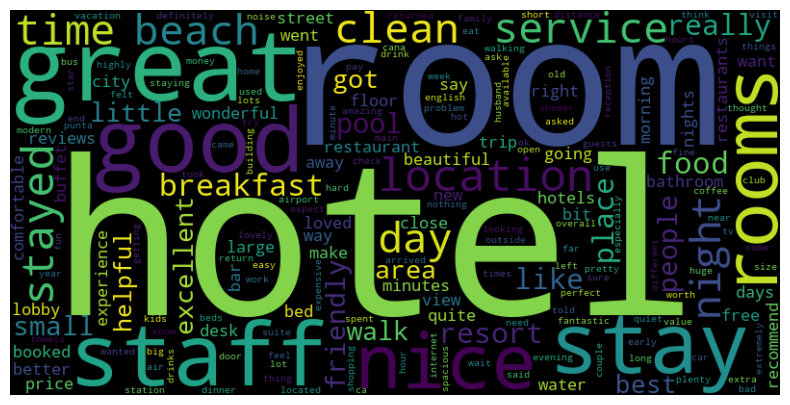

In [23]:
# Plot word cloud for all reviews
plot_wordcloud(word_freq)

### Positive and Negative

In [24]:
# Positive vs. Negative Review Analysis
positive_reviews = data_Hotel_review[data_Hotel_review['Feedback'] == 'Pos']
negative_reviews = data_Hotel_review[data_Hotel_review['Feedback'] == 'Neg']

In [25]:
# Combine tokens from positive and negative reviews
positive_tokens = [token for sublist in positive_reviews['Stemmed_Tokens'] for token in sublist]
negative_tokens = [token for sublist in negative_reviews['Stemmed_Tokens'] for token in sublist]

In [26]:
# Frequency Analysis
positive_word_freq = Counter(positive_tokens)
negative_word_freq = Counter(negative_tokens)

Positive Reviews Word Cloud:


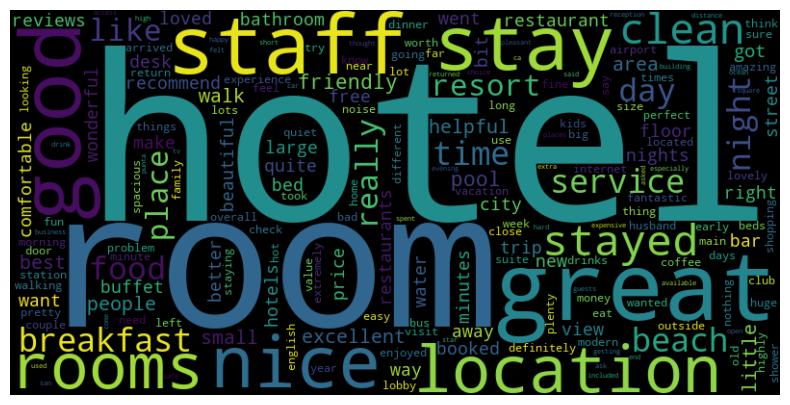

In [27]:
# Plot word clouds for positive and negative reviews
print("Positive Reviews Word Cloud:")
plot_wordcloud(positive_word_freq)

Negative Reviews Word Cloud:


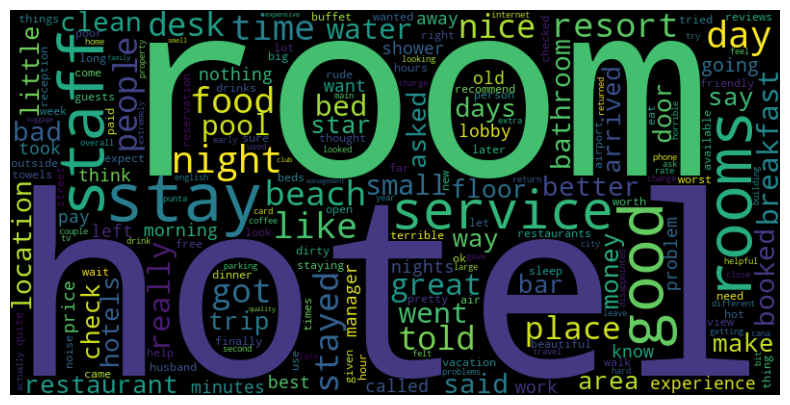

In [28]:
print("Negative Reviews Word Cloud:")
plot_wordcloud(negative_word_freq)

In [29]:
# Plot frequency bar chart for most common words
def plot_word_freq_bar(word_freq, title):
    common_words = word_freq.most_common(20)
    words, counts = zip(*common_words)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

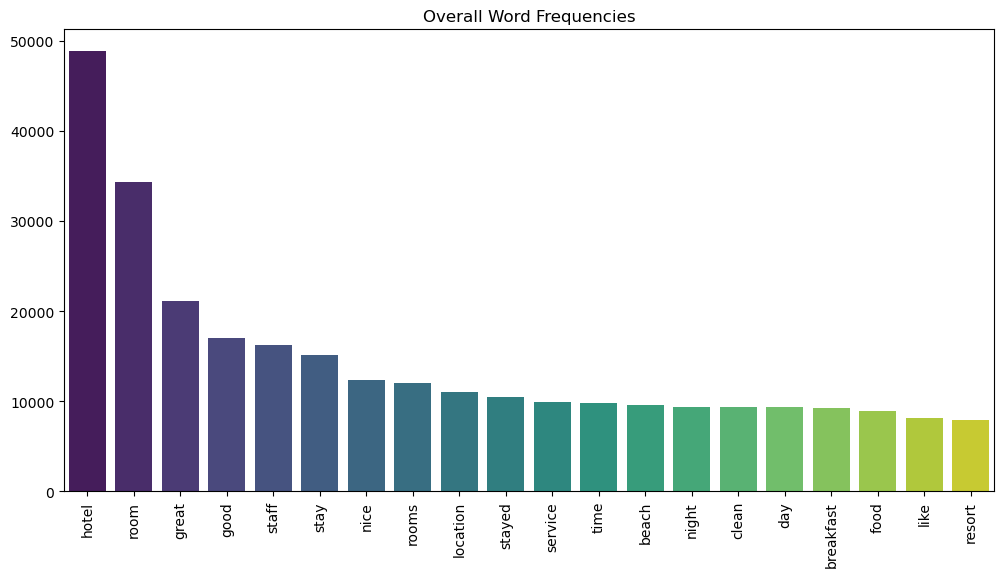

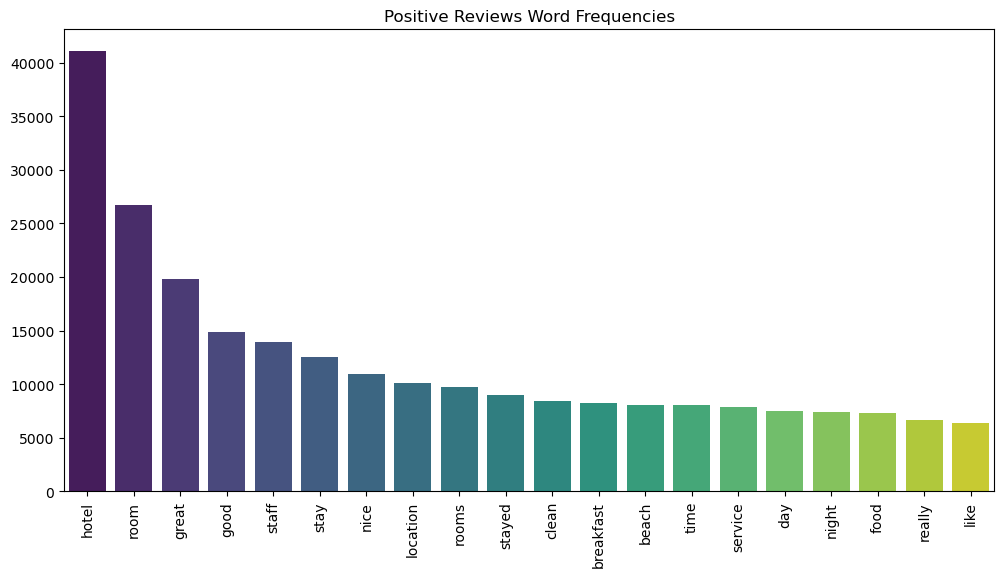

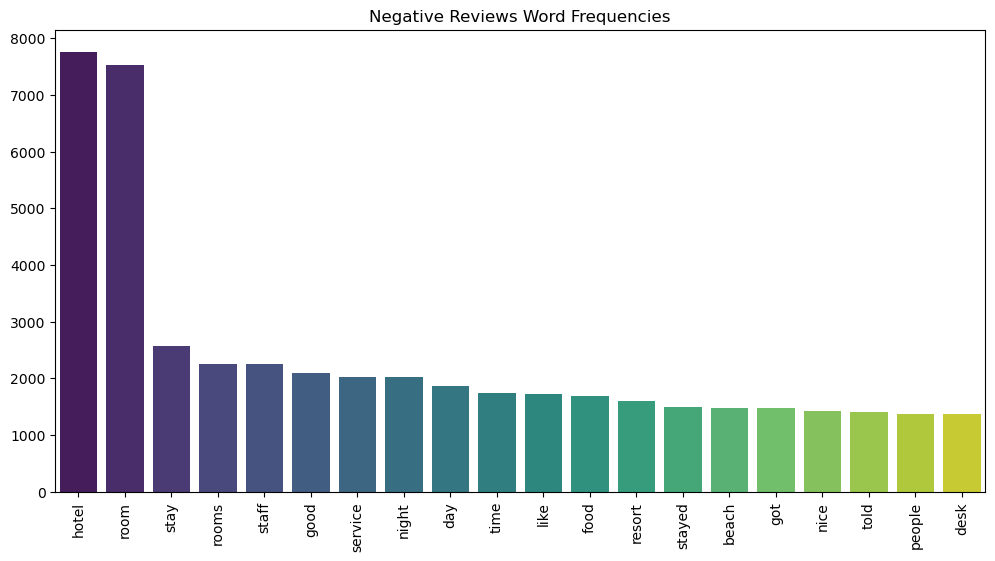

In [30]:
# Bar chart for overall, positive, and negative reviews
plot_word_freq_bar(word_freq, 'Overall Word Frequencies')
plot_word_freq_bar(positive_word_freq, 'Positive Reviews Word Frequencies')
plot_word_freq_bar(negative_word_freq, 'Negative Reviews Word Frequencies')

# Model Building

# Feature Selection

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [103]:
# Convert text to numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_Hotel_review['Processed_Review'])
y = data_Hotel_review['Feedback'].apply(lambda x: 1 if x == 'Pos' else 0)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [35]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Evaluation
y_pred_test_leg_reg = lr_model.predict(X_test)
y_pred_train_leg_reg = lr_model.predict(X_train)

In [37]:
print("Classification Report of Logistic Regression: \n", classification_report(y_test, y_pred_test_leg_reg))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.89      0.57      0.69       955
           1       0.93      0.99      0.96      5193

    accuracy                           0.92      6148
   macro avg       0.91      0.78      0.82      6148
weighted avg       0.92      0.92      0.91      6148



In [38]:
# Calculate accuracy
Test_accuracy = accuracy_score(y_test, y_pred_test_leg_reg)
Train_accuracy = accuracy_score(y_train, y_pred_train_leg_reg)
print(f"Test Logistic Regression Accuracy: {Test_accuracy * 100:.2f}%")
print(f"Train Logistic Regression Accuracy: {Train_accuracy * 100:.2f}%")

Test Logistic Regression Accuracy: 92.19%
Train Logistic Regression Accuracy: 94.86%


In [39]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression Confusion Matrix \n", confusion_matrix(y_test, y_pred_test_leg_reg))

Logistic Regression Confusion Matrix 
 [[ 541  414]
 [  66 5127]]


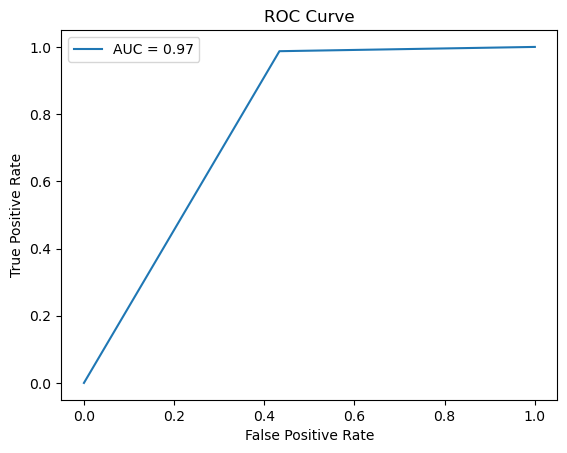

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = lr_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_test_leg_reg)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean():.2f}')

Cross-Validation Scores: [0.93291047 0.9238653  0.91947291 0.92972182 0.92020498]
Average Cross-Validation Score: 0.93


# Support Vector Machines (SVM)

In [44]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
# Evaluation
y_pred_test_svm = svm_model.predict(X_test)
y_pred_train_svm = svm_model.predict(X_train)

In [47]:
print("Classification Report of SVM \n", classification_report(y_test, y_pred_test_svm))

Classification Report of SVM 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       955
           1       0.94      0.98      0.96      5193

    accuracy                           0.93      6148
   macro avg       0.89      0.83      0.86      6148
weighted avg       0.93      0.93      0.93      6148



In [48]:
# Calculate accuracy
svm_Train_accuracy = accuracy_score(y_train, y_pred_train_svm)
svm_Test_accuracy = accuracy_score(y_test, y_pred_test_svm)
print(f"SVM Train Accuracy: {svm_Train_accuracy * 100:.2f}%")
print(f"SVM Test Accuracy: {svm_Test_accuracy * 100:.2f}%")

SVM Train Accuracy: 97.78%
SVM Test Accuracy: 93.01%


In [49]:
print("SVM Confusion Matrix \n", confusion_matrix(y_test, y_pred_test_svm))

SVM Confusion Matrix 
 [[ 649  306]
 [ 124 5069]]


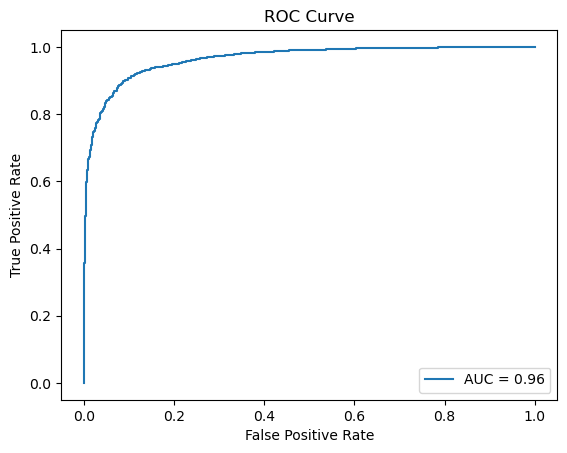

In [50]:
y_scores = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [51]:
scores = cross_val_score(svm_model, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean():.2f}')

Cross-Validation Scores: [0.92339595 0.92606149 0.93020986 0.93289409 0.92606149]
Average Cross-Validation Score: 0.93


# Neural Networks / Deep Learning

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.8183 - loss: 0.5471 - val_accuracy: 0.8447 - val_loss: 0.3633
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.8453 - loss: 0.3263 - val_accuracy: 0.8684 - val_loss: 0.2700
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.8888 - loss: 0.2305 - val_accuracy: 0.9089 - val_loss: 0.2185
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.9469 - loss: 0.1680 - val_accuracy: 0.9245 - val_loss: 0.1841
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9651 - loss: 0.1154 - val_accuracy: 0.9276 - val_loss: 0.1703
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report of Neural Network 
               precision    recall  f1-score   support

           0       0.85      0.65      0.74       955
           1       0.94      0.98      0.96      5193

    accuracy                           0.93      6148
   macro avg       0.89

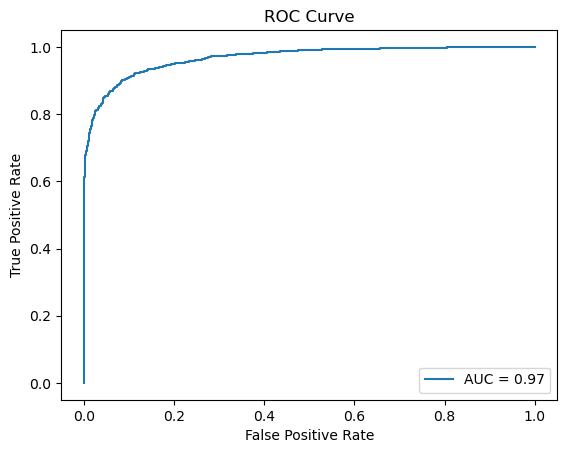

Cross-Validation Scores: [0.9304708242416382, 0.9267935752868652, 0.9402147531509399, 0.9267935752868652, 0.9355783462524414]
Average Cross-Validation Score: 0.93


In [55]:
from sklearn.model_selection import KFold
# Assuming X_train, X_test, y_train, y_test are already defined
input_shape = (X_train.shape[1],)
nn_model = create_nn_model(input_shape)

# Train the model
nn_model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test))

# Evaluation
y_pred_test_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
y_pred_tain_nn = (nn_model.predict(X_train) > 0.5).astype("int32")

print("Classification Report of Neural Network \n", classification_report(y_test, y_pred_test_nn))

# Calculate accuracy
nn_test_accuracy = accuracy_score(y_test, y_pred_test_nn)
nn_train_accuracy = accuracy_score(y_train, y_pred_tain_nn)
print(f"NN and Deep Learning Test Accuracy: {nn_test_accuracy * 100:.2f}%")
print(f"NN and Deep Learning Train Accuracy: {nn_train_accuracy * 100:.2f}%")

# Confusion Matrix
print("NN and Deep Learning Confusion Matrix \n", confusion_matrix(y_test, y_pred_test_nn))

# Predict probability scores for the test set
y_prob = nn_model.predict(X_test).ravel()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Cross-Validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_nn_model(input_shape)
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=512, verbose=0, validation_data=(X_val_fold, y_val_fold))
    
    score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(score[1])  # accuracy is the second element

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores):.2f}')

# Bayesian Networks

In [56]:
#pip install pgmpy

Cross-Validation Accuracy Scores: [0.8470358624054648, 0.837725719863348, 0.8418740849194729, 0.8413860419716935, 0.8462664714494875]
Average Cross-Validation Accuracy: 0.84
Cross-Validation ROC AUC Scores: [0.4801010938399539, 0.5063652431398917, 0.4728998926462694, 0.48907345019949505, 0.47747409959119]
Average Cross-Validation ROC AUC: 0.49
Confusion Matrices for each fold:
Fold 1 Confusion Matrix:
[[   0  625]
 [   2 3472]]
Fold 2 Confusion Matrix:
[[   0  665]
 [   0 3433]]
Fold 3 Confusion Matrix:
[[   0  648]
 [   0 3450]]
Fold 4 Confusion Matrix:
[[   0  649]
 [   1 3448]]
Fold 5 Confusion Matrix:
[[   0  627]
 [   3 3468]]
Classification Report for the Final Fold:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3214
           1       0.84      1.00      0.91     17277

    accuracy                           0.84     20491
   macro avg       0.42      0.50      0.46     20491
weighted avg       0.71      0.84      0.77  

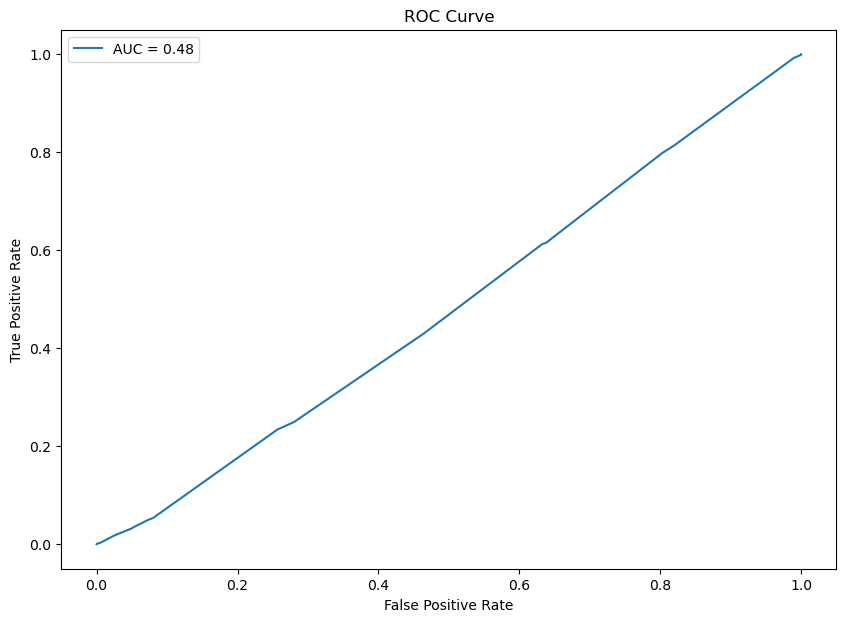

In [58]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, KFold
# Encoding the sentiment labels
data_Hotel_review['Sentiment_Label'] = LabelEncoder().fit_transform(data_Hotel_review['Feedback'])

# Feature extraction: Word count as a feature
data_Hotel_review['Word_Count'] = data_Hotel_review['Processed_Review'].apply(lambda x: len(x.split()))

# Discretize the Word_Count feature
bin_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_Hotel_review['Word_Count_Binned'] = bin_discretizer.fit_transform(data_Hotel_review[['Word_Count']])

# Split the data into features and target
X = data_Hotel_review[['Word_Count_Binned']]
y = data_Hotel_review['Sentiment_Label']

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store cross-validation results
accuracy_scores_test = []
accuracy_scores_train = []
roc_aucs = []
confusion_matrices = []
y_test_all = []
y_pred_all = []
y_prob_all = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creating a Bayesian Network
    model = BayesianNetwork([('Word_Count_Binned', 'Sentiment_Label')])

    # Fit the model using training data
    train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    model.fit(train_data, estimator=MaximumLikelihoodEstimator)

    # Making predictions using VariableElimination
    inference = VariableElimination(model)

    # Predicting probabilities for the test set
    y_prob_Test = []
    for index, row in X_test.iterrows():
        word_count_binned = row['Word_Count_Binned']
        evidence = {'Word_Count_Binned': word_count_binned}
        try:
            prob = inference.query(variables=['Sentiment_Label'], evidence=evidence)
            prob_array = np.array(prob.values)
            y_prob_Test.append(prob_array[1])  # Probability of the positive class
        except KeyError as e:
            y_prob_Test.append(0)  # Handle error by appending a default value
            
    # Predicting probabilities for the Train set
    y_prob_train = []
    for index, row in X_train.iterrows():
        word_count_binned = row['Word_Count_Binned']
        evidence = {'Word_Count_Binned': word_count_binned}
        try:
            prob = inference.query(variables=['Sentiment_Label'], evidence=evidence)
            prob_array = np.array(prob.values)
            y_prob_train.append(prob_array[1])  # Probability of the positive class
        except KeyError as e:
            y_prob_train.append(0)  # Handle error by appending a default value
    # Convert probabilities to class labels
    y_pred_Test = np.array(y_prob_Test).round().astype(int)
    y_pred_Train = np.array(y_prob_train).round().astype(int)

    # Calculate metrics
    accuracy_Test = accuracy_score(y_test, y_pred_Test)
    accuracy_Train = accuracy_score(y_train, y_pred_Train)
    fpr, tpr, _ = roc_curve(y_test, y_prob_Test)
    auc = roc_auc_score(y_test, y_prob_Test)
    confusion = confusion_matrix(y_test, y_pred_Test)
 
    # Append scores
    accuracy_scores_test.append(accuracy_Test)
    accuracy_scores_train.append(accuracy_Train)
    roc_aucs.append(auc)
    confusion_matrices.append(confusion)
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred_Test)
    y_prob_all.extend(y_prob_Test)

# Print cross-validation results
print(f'Cross-Validation Accuracy Scores: {accuracy_scores_test}')
print(f'Average Cross-Validation Accuracy: {np.mean(accuracy_scores_test):.2f}')
print(f'Cross-Validation ROC AUC Scores: {roc_aucs}')
print(f'Average Cross-Validation ROC AUC: {np.mean(roc_aucs):.2f}')
print(f'Confusion Matrices for each fold:')
for i, cm in enumerate(confusion_matrices):
    print(f'Fold {i+1} Confusion Matrix:\n{cm}')

# Classification report for the final fold
print("Classification Report for the Final Fold:\n", classification_report(y_test_all, y_pred_all))

# Plot ROC curve for the last fold
fpr, tpr, _ = roc_curve(y_test_all, y_prob_all)
auc = roc_auc_score(y_test_all, y_prob_all)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Test Accuracy: 84.70%
Random Forest Train Accuracy: 84.22%
Confusion Matrix:
[[   0  627]
 [   0 3471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.85      1.00      0.92      3471

    accuracy                           0.85      4098
   macro avg       0.42      0.50      0.46      4098
weighted avg       0.72      0.85      0.78      4098



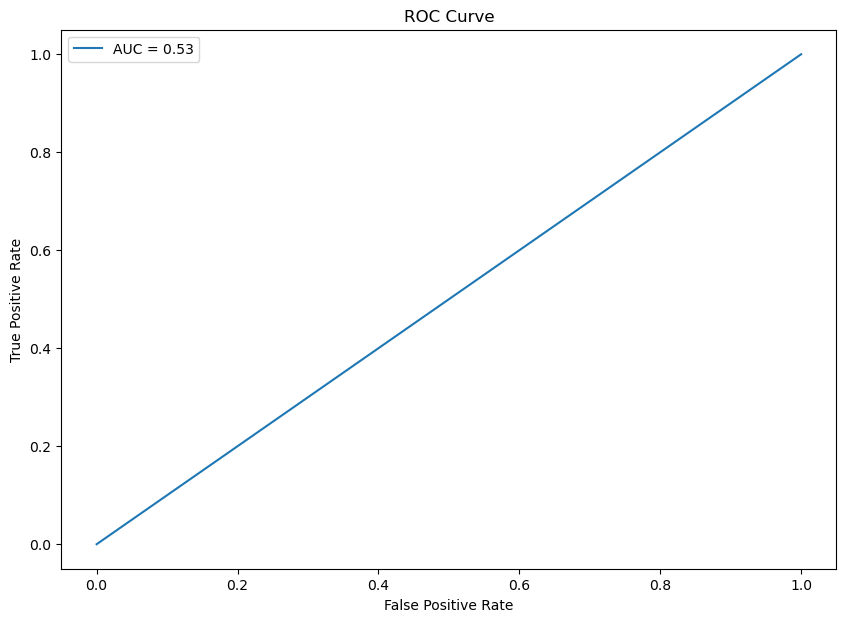

In [63]:
# Predictions
test_y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
train_y_pred = rf_model.predict(X_train)
# Evaluation Metrics
accuracy_test= accuracy_score(y_test, test_y_pred)
accuracy_train = accuracy_score(y_train, train_y_pred)
print(f"Random Forest Test Accuracy: {accuracy_test * 100:.2f}%")
print(f"Random Forest Train Accuracy: {accuracy_train * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, test_y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

print("Classification Report:\n", classification_report(y_test, test_y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, test_y_pred)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [64]:
# Cross-Validation
cross_val_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Average Cross-Validation Score: {cross_val_scores.mean():.2f}')

Cross-Validation Scores: [0.84313247 0.84333821 0.84309419 0.84309419 0.84309419]
Average Cross-Validation Score: 0.84


# Naive Bayes Classifier

In [45]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb_test = nb_model.predict(X_test)
y_pred_nb_train = nb_model.predict(X_train)

In [46]:
# Evaluate the model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb_test))
accuracy_test= accuracy_score(y_test, y_pred_nb_test)
accuracy_train = accuracy_score(y_train, y_pred_nb_train)
print(f"Naive Bayes Test Accuracy: {accuracy_test * 100:.2f}%")
print(f"Naive Bayes Train Accuracy: {accuracy_train * 100:.2f}%")

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.00      0.00       955
           1       0.84      1.00      0.92      5193

    accuracy                           0.84      6148
   macro avg       0.76      0.50      0.46      6148
weighted avg       0.82      0.84      0.77      6148

Naive Bayes Test Accuracy: 84.48%
Naive Bayes Train Accuracy: 84.33%


In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb_test)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[   2  953]
 [   1 5192]]


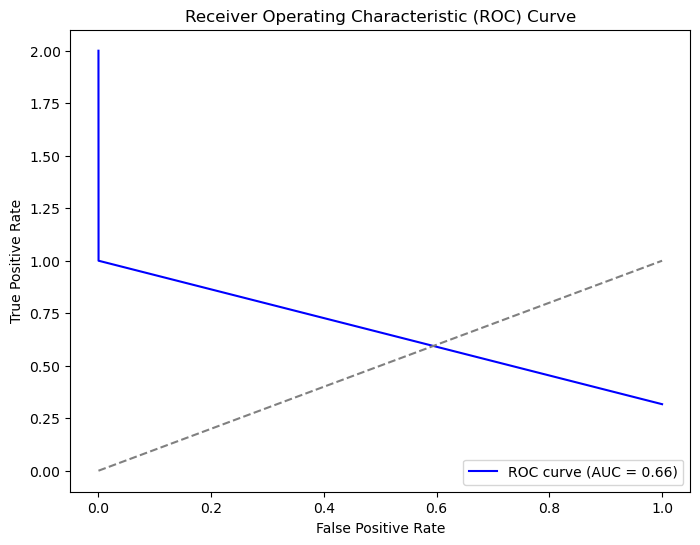

In [73]:
from sklearn.preprocessing import label_binarize
# Import the necessary function from sklearn
from sklearn.metrics import roc_curve, auc

# ROC Curve and AUC
y_test_bin = label_binarize(y_test, classes=['neg', 'pos'])  # Convert y_test to binary format
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class


#ask sir about this to confirm
fpr, _ , tpr = roc_curve(y_test_bin, y_pred_proba_nb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print("")

In [72]:
roc_curve(y_test_bin, y_pred_proba_nb)

(array([0.00000000e+00, 1.62654522e-04, 1.00000000e+00]),
 array([nan, nan, nan]),
 array([1.99999874, 0.99999874, 0.31684189]))

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# Cross-Validation with AUC
cv = StratifiedKFold(n_splits=5)
auc_scores = cross_val_score(nb_model, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation AUC Scores:", auc_scores)
print("Mean AUC:", auc_scores.mean())

Cross-Validation AUC Scores: [0.89271436 0.88369498 0.9002433  0.895534   0.88678567]
Mean AUC: 0.8917944618894953


# Deep Learning Model

In [105]:
from tensorflow.keras.utils import to_categorical
# Convert y to one-hot encoding
y = to_categorical(y, num_classes=2)

In [106]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20491, 47397)
Shape of y: (20491, 2)


In [107]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y.argmax(axis=1), random_state=42)

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Define the model creation function
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))  # Input layer with TF-IDF feature size
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold Training Accuracy: 99.96%
Fold Testing Accuracy: 98.50%
Fold Validation Accuracy: 91.78%
Confusion Matrix:
 [[ 480  145]
 [ 192 3282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       625
           1       0.96      0.94      0.95      3474

    accuracy                           0.92      4099
   macro avg       0.84      0.86      0.85      4099
weighted avg       0.92      0.92      0.92      4099

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold Training Accuracy: 99.97%
Fold Testing Accuracy: 98.19%
Fold Validation Accuracy: 91.36%
Confusion Matrix:
 [[ 490  175]
 [ 179 3254]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73 

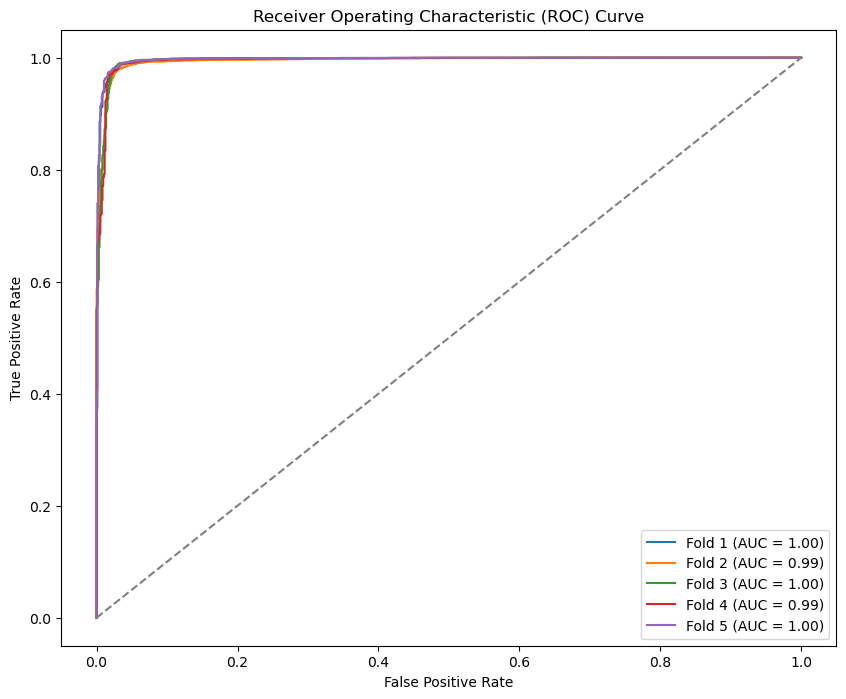

In [124]:
from sklearn.model_selection import KFold
from tensorflow.keras import backend as K
# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
train_accuracies = []
test_accuracies = []
val_accuracies = []
# Store ROC curves and AUC for each fold
fpr_list = []
tpr_list = []
roc_auc_list = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model = create_model(X.shape[1])  # Create a new model instance for each fold
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64, verbose=0)
    
    # Evaluate the model on validation set
    y_pred_val = model.predict(X_val)
    y_pred_classes_val = np.argmax(y_pred_val, axis=1)
    y_true_val = np.argmax(y_val, axis=1)
    val_acc = accuracy_score(y_true_val, y_pred_classes_val)
    val_accuracies.append(val_acc)
    
    # Evaluate the model on training set
    y_pred_train = model.predict(X_train)
    y_pred_classes_train = np.argmax(y_pred_train, axis=1)
    y_true_train = np.argmax(y_train, axis=1)
    train_acc = accuracy_score(y_true_train, y_pred_classes_train)
    train_accuracies.append(train_acc)
    
    # Evaluate the model on Test set
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = y_pred_test[:, 1]  
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)
    y_true_test = np.argmax(y_test, axis=1)
    test_acc = accuracy_score(y_true_test, y_pred_classes_test)
    test_accuracies.append(test_acc)
    
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_true_test, y_pred_proba_test)
    roc_auc = auc(fpr, tpr)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)
    
    # Store and print results
    cv_scores.append(val_acc * 100)  # Convert to percentage
    print(f"Fold Training Accuracy: {train_acc * 100:.2f}%")
    print(f"Fold Testing Accuracy: {test_acc * 100:.2f}%")
    print(f"Fold Validation Accuracy: {val_acc * 100:.2f}%")
    print("Confusion Matrix:\n", confusion_matrix(y_true_val, y_pred_classes_val))
    print("Classification Report:\n", classification_report(y_true_val, y_pred_classes_val))
    
    # Optional: Clear Keras session to avoid clutter from old models
    K.clear_session()

# Print cross-validation results
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}%")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cv_scores):.2f}%")
print(f"Mean Training Accuracy: {np.mean(train_accuracies) * 100:.2f}%")
print(f"Mean Validation Accuracy: {np.mean(val_accuracies) * 100:.2f}%")

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

###### Fold Training Accuracy: Accuracy on the training data for each fold.
###### Fold Testing Accuracy: Accuracy on the Testing data for each fold.
###### Fold Validation Accuracy: Accuracy on the validation data for each fold.
###### Mean Training Accuracy: Average training accuracy across all folds.
###### Mean Validation Accuracy: Average validation accuracy across all folds.
###### Mean and Standard Deviation of Cross-Validation Accuracy: Provides insight into model performance and variability across folds.